# Środowisko **MountainCar**

**Pojazd** znajduje się na **jednowymiarowym torze** (**patrz rysunek poniżej**), umieszczonym pomiędzy dwoma wzniesieniami. **Celem jest wjechanie pojazdu na górę po prawej stronie** (miejsce oznaczone chorągiewką). Silnik samochodu nie jest wystarczająco mocny, aby bezpośrednio wjechać na górę. **Możliwym rozwiązaniem jest jazda "tam iz powrotem", w lewo i prawo i nabranie rozpędu**. 

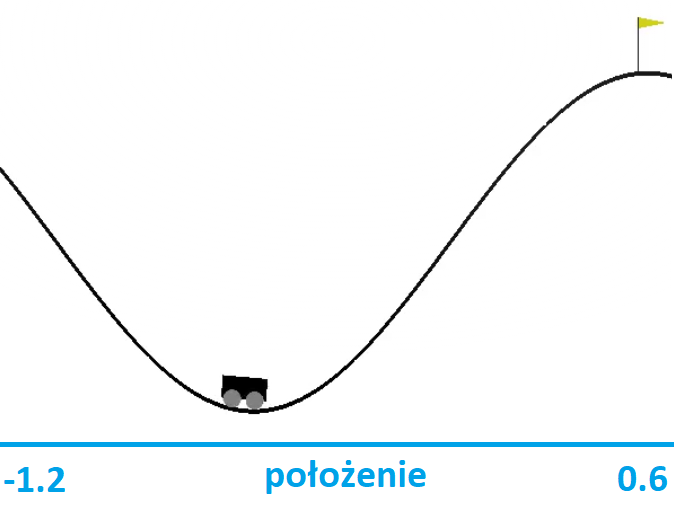

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

**Stan** reprezentowany jest za pomocą wektora **[położenie,prędkość]**. **Stan początkowy** ma losowe **położenie od -0,6 do -0,4** (położenie w dolinie) i **prędkość=0**:

In [ ]:
env = gym.make("MountainCar-v0")
State_0 = env.reset()
State_0

array([-0.50484306,  0.        ])

Wartości **min** i **max** położenia oraz prędkości:

In [ ]:
print("położenie min=",env.observation_space.low[0]," max=",env.observation_space.high[0])
print("prędkość min=",env.observation_space.low[1]," max=",env.observation_space.high[1])

położenie min= -1.2  max= 0.6
prędkość min= -0.07  max= 0.07


# Akcje

Możliwe do wykonania są **3 akcje**, oznaczone **0,1,2**:

In [ ]:
env.action_space

Discrete(3)

Przetestujmy **akcję 0** - wykonajmy ją **10 razy**:

In [ ]:
env.reset()
for _ in range(10):
    action = 0
    obs, reward, done, info = env.step(action)
    print("stan=",obs)

stan= [-5.98463955e-01 -4.46484837e-04]
stan= [-0.59935366 -0.0008897 ]
stan= [-0.60068008 -0.00132642]
stan= [-0.60243353 -0.00175345]
stan= [-0.60460122 -0.00216769]
stan= [-0.60716735 -0.00256613]
stan= [-0.61011326 -0.00294591]
stan= [-0.61341757 -0.00330431]
stan= [-0.61705636 -0.00363879]
stan= [-0.62100337 -0.00394701]


Jak widać powyżej akcja 0 powoduje **pchnięcie pojazdu w lewą stronę** (zmniejszeniu ulega pierwsza współrzędna) i **zwiększeniu ulega prędkość pojazdu w lewą stronę** (druga współrzędna - ujemna wartość prędkości).

W przypadku pozostałych akcji: **1 - brak pchnięcia pojazdu**, **2 - popchnięcie w prawo**.

Przetestujmy działanie środowiska - **wykonajmy pewną ilość (dokładnie 50) akcji 0** (pchnięcie pojazdu w lewą stronę):

In [ ]:
env.reset()
for _ in range(50):
    action = 0
    obs, reward, done, info = env.step(action)
    print("położenie: ",obs[0]," prędkość: ",obs[1])
    if obs[1]<0:
      print("pojazd porusza się w LEWO")
    else:
      print("pojazd porusza się w PRAWO")

położenie:  -0.5337527216458521  prędkość:  -0.0009308354969562322
pojazd porusza się w LEWO
położenie:  -0.5356074143245128  prędkość:  -0.0018546926786606574
pojazd porusza się w LEWO
położenie:  -0.5383720616934771  prędkość:  -0.00276464736896428
pojazd porusza się w LEWO
położenie:  -0.5420259456861962  prędkość:  -0.003653883992719178
pojazd porusza się w LEWO
położenie:  -0.5465416962853357  prędkość:  -0.004515750599139494
pojazd porusza się w LEWO
położenie:  -0.5518855108093416  prędkość:  -0.005343814524005863
pojazd porusza się w LEWO
położenie:  -0.5580174293525734  prędkość:  -0.006131918543231838
pojazd porusza się w LEWO
położenie:  -0.5648916664539041  prędkość:  -0.006874237101330716
pojazd porusza się w LEWO
położenie:  -0.572456998363301  prędkość:  -0.007565331909396902
pojazd porusza się w LEWO
położenie:  -0.5806572042889377  prędkość:  -0.008200205925636772
pojazd porusza się w LEWO
położenie:  -0.5894315587745644  prędkość:  -0.008774354485626731
pojazd porusza

Jak widać powyżej pojazd **początkowo porusza się w lewo**, ale **po pewnym czasie zaczyna opadać, czyli poruszać się w prawo**. W tym momencie prędkość pojazdu zmienia wartość z ujemnej (prędkość w lewo) na dodatnią (prędkość w prawo). 

Zobaczmy co się dzieje dalej. Spróbujmy wykonać teraz pewną ilość razy **akcję 1 czyli brak pchnięcia** (UWAGA: **nie resetujemy stanu środowiska!!!**):

In [ ]:
for _ in range(50):
    action = 1
    obs, reward, done, info = env.step(action)
    print("położenie: ",obs[0]," prędkość: ",obs[1])
    if obs[1]<0:
      print("pojazd porusza się w LEWO")
    else:
      print("pojazd porusza się w PRAWO")

położenie:  -0.7297460418484281  prędkość:  0.009989698410582948
pojazd porusza się w PRAWO
położenie:  -0.7183069277647243  prędkość:  0.01143911408370376
pojazd porusza się w PRAWO
położenie:  -0.7054891406320862  prędkość:  0.012817787132638047
pojazd porusza się w PRAWO
położenie:  -0.691373873885804  prędkość:  0.014115266746282312
pojazd porusza się w PRAWO
położenie:  -0.6760527543811004  prędkość:  0.015321119504703593
pojazd porusza się w PRAWO
położenie:  -0.6596276780729396  prędkość:  0.01642507630816068
pojazd porusza się w PRAWO
położenie:  -0.6422104670672758  prędkość:  0.017417211005663874
pojazd porusza się w PRAWO
położenie:  -0.6239223229402759  prędkość:  0.01828814412699989
pojazd porusza się w PRAWO
położenie:  -0.6048930604206525  prędkość:  0.01902926251962342
pojazd porusza się w PRAWO
położenie:  -0.5852601169283335  prędkość:  0.01963294349231898
pojazd porusza się w PRAWO
położenie:  -0.5651673463607513  prędkość:  0.02009277056758223
pojazd porusza się w P

Po zmianach położenia widać, że **pojazd początkowo kontynuuje ruch w prawo** (wartość położenia ulega zwiększeniu) czyli **podjeżdża pod wzniesienie z prawej strony**. Po pewnym czasie jednak **prędkość zmienia wartość z dodatniej na ujemną** co oznacza, że **pojazd zaczyna opadać czyli porusza się w lewo**.  

# Nagrody

Nagroda wynosi **-1 za każdy krok czasowy**, aż do osiągnięcia **docelowej pozycji 0.5** (położenie chorągiewki). 

# Zakończenie epizodu

Zakończenie epizodu następuje w chwili **osiągnięcia położenia 0.5** lub **po przejściu 200 kroków**.

Przetestujmy działanie środowiska w przypadku **losowego wyboru akcji** (`action = env.action_space.sample()`).

In [ ]:
R = 0
env.reset()
for e in range(300):
    #env.render()
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print("Epizod=",e," akcja=",action," R=",reward," koniec epizodu?=",done," stan=",obs)

Epizod= 0  akcja= 2  R= -1.0  koniec epizodu?= False  stan= [-0.53436026  0.00108886]
Epizod= 1  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.5331907   0.00116956]
Epizod= 2  akcja= 2  R= -1.0  koniec epizodu?= False  stan= [-0.53094922  0.00224149]
Epizod= 3  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.52865261  0.00229661]
Epizod= 4  akcja= 2  R= -1.0  koniec epizodu?= False  stan= [-0.5253181   0.00333451]
Epizod= 5  akcja= 2  R= -1.0  koniec epizodu?= False  stan= [-0.52097069  0.00434741]
Epizod= 6  akcja= 2  R= -1.0  koniec epizodu?= False  stan= [-0.51564299  0.0053277 ]
Epizod= 7  akcja= 0  R= -1.0  koniec epizodu?= False  stan= [-0.51137496  0.00426803]
Epizod= 8  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.50719858  0.00417638]
Epizod= 9  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.50314516  0.00405342]
Epizod= 10  akcja= 1  R= -1.0  koniec epizodu?= False  stan= [-0.49924504  0.00390012]
Epizod= 11  akcja= 0  R= -1.0  koniec epizodu?= False

Jak widać **po 200 krokach następuje zakończenie epizodu**.

# Rozwiązanie **zadania 1** z zestawu 11

In [ ]:
#DO UZUPEŁNIENIA
env.reset()
for _ in range(80):
    action = 0
    obs, reward, done, info = env.step(action)
    print("położenie: ",obs[0]," prędkość: ",obs[1])
    if obs[1]<0:
      print("pojazd porusza się w LEWO")
    else:
      print("pojazd porusza się w PRAWO")
      action = 2

położenie:  -0.4838008641102771  prędkość:  -0.0013075098966793728
pojazd porusza się w LEWO
położenie:  -0.4864061497061203  prędkość:  -0.002605285595843153
pojazd porusza się w LEWO
położenie:  -0.49028980156363206  prędkość:  -0.003883651857511746
pojazd porusza się w LEWO
położenie:  -0.49542285518006735  prędkość:  -0.005133053616435269
pojazd porusza się w LEWO
położenie:  -0.5017669766453619  prędkość:  -0.006344121465294497
pojazd porusza się w LEWO
położenie:  -0.50927471956452  prędkość:  -0.007507742919158122
pojazd porusza się w LEWO
położenie:  -0.5178898598433522  prędkość:  -0.00861514027883229
pojazd porusza się w LEWO
położenie:  -0.5275478148971643  prędkość:  -0.009657955053812079
pojazd porusza się w LEWO
położenie:  -0.5381761528490604  prędkość:  -0.010628337951896053
pojazd porusza się w LEWO
położenie:  -0.5496951953172741  prędkość:  -0.011519042468213659
pojazd porusza się w LEWO
położenie:  -0.5620187145143152  prędkość:  -0.012323519197041093
pojazd porusza

Rozwiązanie zadania 2 z zestawu 11


In [ ]:
env = gym.make('MountainCar-v0')
env.reset()

array([-0.56321908,  0.        ])

In [ ]:
#https://gist.github.com/gkhayes/3d154e0505e31d6367be22ed3da2e955

def QLearning(env, learning, discount, epsilon, min_eps, episodes):

    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1    

    Q = np.random.uniform(low = -1, high = 1,size = (num_states[0], num_states[1],env.action_space.n))    
 
    reward_list = []
    ave_reward_list = []    

    for i in range(episodes):
  
        epsilon = epsilon - (1/episodes)
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
   
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
  
            if i >= (episodes - 20):
                env.render()
                
          
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)                
    
            state2, reward, done, info = env.step(action)             
      
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)            
           
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward                
           
            else:
                delta = learning*(reward +discount*np.max(Q[state2_adj[0],state2_adj[1]]) - Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta                                     
       
            tot_reward += reward
            state_adj = state2_adj        

        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
    env.close()
    
    return ave_reward_list

Te rzeczy ponizej są bo mialem jakieś problemy z collabem

In [ ]:
pip install pyglet==1.5.11

In [ ]:
%%bash

# install required system dependencies
apt-get install -y xvfb x11-utils

# install required python dependencies (might need to install additional gym extras depending)
pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

#import
import pyvirtualdisplay
_display = pyvirtualdisplay.Display(visible=0,  # remember to use visible=0 and not False
                                    size=(1400, 900))
_ = _display.start()

#check
!echo $DISPLAY

In [ ]:
# Run Q-learning algorithm
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 5000)


  

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -199.56
Episode 2700 Average Reward: -199.93
Episode 2800 Average Reward: -200.0

NameError: ignored

In [ ]:
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('rewards.jpg')     
plt.close()  
  

NameError: ignored